# Covid-19 Pandemic Summary

__Covid-19 Origin__

The Covid-19 pandemic started by a coronavirus named SARS-CoV-2 where "SARS" means _Severe Acute Respiratory Syndrome_ and "CoV" means Coronavirus which is a family of viruses (e.g. Covid-19, SARS-CoV-2, MERS-CoV). SARS-CoV-2, the virus responsible for COVID-19, belongs to a group of genetically related
viruses that includes SARS-CoV, the cause of the SARS outbreak in 2003, and a number of other CoVs isolated from bat populations. The first human cases of COVID-19, the coronavirus disease caused by SARS-CoV-2, were first reported from Wuhan City, China, in December 2019. 

Source: https://apps.who.int/iris/bitstream/handle/10665/332197/WHO-2019-nCoV-FAQ-Virus_origin-2020.1-eng.pdf

__SARS-CoV-2 Variants__

All viruses change over time. Some changes may affect the virus’s properties, such as how easily it spreads, the associated disease severity, or the performance of vaccines, therapeutic medicines, diagnostic tools, or other public health and social measures. During late 2020, the emergence of variants that posed an increased risk to global public health prompted the characterisation of specific Variants of Interest (VOIs) and Variants of Concern (VOCs). At the present time, the expert group convened by WHO has recommended using letters of the Greek Alphabet, i.e., Alpha, Beta, Gamma, Delta which will be easier and more practical to be discussed by non-scientific audiences.

Source: https://www.who.int/en/activities/tracking-SARS-CoV-2-variants/

__Safety Measures__

While the COVID-19 is continuing to propagate around the world, safety measures have been enforced in many countries in order to reduce the propagation of the virus between people. Some countries applied safety measures like social distancing, partial closing of non-essential services or stores, limitation of people in stores, wearing a mask mainly in close spaces, desinfection of hands, curfew and many other measures. However, scientifics have developed vaccines (e.g. Moderna, Pfizer) to reduce the effects of the virus and then reduce the risk of people hospitalization and death.

The objective is to visualize and understand how the Covid-19 is propagated in different countries in order to define a mathematical model simulating it. 

# Datasets Gathering
We know that the dataset provided on Covid-19 confirmed cases is an approximation of the reality. Some people have not been tested (for any reasons) and then are not counted. Some countries do not have the resources and money to test all people, so the number of cases could be much less then it should be. The data collected is a best effort to approximate the real number of infected, deaths, vaccinated and hospitalized people.

The objective is to gather information on:
- Population in every country;
- Number of people that have been infected by the Covid-19 (or that are infected) in every country;
- Number of people dead of the Covid-19 in every country;
- Vaccination against Covid-19 of people in countries;
- Hospitalizations and intensive care (ICU) due to Covid-19 in countries.

The source of data used comes from https://github.com/owid/covid-19-data.

In [1]:
'''
ONLY for those who use Google Colab with Google Drive. 
Mount your Google Drive repository and select the folder where your files are located.
If using your hard drive with local host, remove this section of code.
'''
from google.colab import drive

drive.mount('/content/drive')
%cd /content/drive/MyDrive/Colab\ Notebooks/Covid19
PATH = "/content/drive/MyDrive/Colab\ Notebooks/Covid19"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab Notebooks/Covid19


In [2]:
# Import of the main libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

# Import *.py files
import Utils
import DatasetDownloader
import Printer
import VaccinationsPrinter
import CasesDeathsPreparator
import CasesAndDeathsPrinter
import PropagationModel

# Import ipywidgets for having a UI to select a items from a dropdown list.
Utils.installPackageIfNotInstalled("ipywidgets")
import ipywidgets as widgets

## Population
The source of the dataset and features description are given here: https://github.com/owid/covid-19-data/tree/master/scripts/input/un.

In [3]:
url = "https://raw.githubusercontent.com/owid/covid-19-data/master/scripts/input/un/population_latest.csv"
population = DatasetDownloader.downloadPopulationDataset(url)
#https://raw.githubusercontent.com/owid/covid-19-data/master/scripts/input/un/median_age.csv
#https://github.com/owid/covid-19-data/blob/master/scripts/input/owid/life_expectancy.csv

## Vaccinations
The source of the dataset and features description are given here: https://github.com/owid/covid-19-data/tree/master/public/data/vaccinations.

In [4]:
url = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv"
vaccination = DatasetDownloader.downloadVaccinationsDataset(url)

url = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations-by-manufacturer.csv"
vaccinations_by_manufacturer = DatasetDownloader.downloadVaccinationsByManufacturerDataset(url)

url = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations-by-age-group.csv"
vaccinations_by_age_group = DatasetDownloader.downloadVaccinationsByAgeGroupDataset(url)

## Confirmed Cases and Deaths
The source of the dataset and features description are given here: https://github.com/owid/covid-19-data/tree/master/scripts/input/jhu. 

In [5]:
url = "https://raw.githubusercontent.com/owid/covid-19-data/master/scripts/input/jhu/time_series_covid19_confirmed_global.csv"
cases = DatasetDownloader.downloadCasesDataset(url)

url = "https://raw.githubusercontent.com/owid/covid-19-data/master/scripts/input/jhu/time_series_covid19_deaths_global.csv"
deaths = DatasetDownloader.downloadDeathsDataset(url)

cases_deaths = CasesDeathsPreparator.mergeCasesAndDeathsDatasets(cases, deaths)

## Hospitalizations
The source of the dataset and features description are given here: https://github.com/owid/covid-19-data/tree/master/public/data/hospitalizations.

In [6]:
url = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/hospitalizations/covid-hospitalizations.csv"
hospitalizations = DatasetDownloader.downloadHospitalizationsDataset(url)

# Dashboard
The dashboards present a summary visualization of the cases, deaths, vaccinations and hospitalizations to know the history progression of the Covid-19 by region. A dropdown list is added in order to select the region's dashboard to visualize. 

The objective is to display dynamically a dashboard based on a region (could be a country or the world) selected in a dropdown list. The dashboard presents:
- The cumulative number of cases and death;
- The new daily cases and deaths;
- The percentages of people not vaccinated, with only the first dose, with first and second doses, and with all 3 doses;
- The number of people vaccinated with at least one dose, at least 2 doses and all 3 doses;
- The cumulative total number of vaccins administrated;
- The new daily number of vaccins administrated;
- The cumulative number of people vaccinated with at least one dose, at least 2 doses and all 3 doses;
- The new daily number of first dose administrated;
- The new daily number of people hospitalized and intensive care (ICU);
- The number of people hospitalized per million people;
- The number of vaccins administrated per manufacturer (e.g. Moderna, Pfizer);
- The number of vaccins (first, second and third doses) administrated per age group (e.g. 0-17 years old, 18-25 years old).


In [7]:
def onChangeRegion(change):
    if change['new'] != change['old']:
        clear_output()
        display(dropdown_regions)

        if change['new'] != "(Select a region)":
            # Cases and deaths summaries and charts for the world or a specific country.
            if change['new'] == "World":
                CasesAndDeathsPrinter.displayWorldSummary(cases_deaths, population)
            else:
                CasesAndDeathsPrinter.displayRegionSummary(cases_deaths, population, change['new'])

            # Vaccination summary and charts for the world or a specific country if it exists.
            if change['new'] in set(vaccination['entity']):
                Printer.plotVaccinationsByRegion(vaccination, change['new'])

            if change['new'] in set(hospitalizations['entity']):
                Printer.plotHospitalizationsByRegion(hospitalizations, change['new'])

            if change['new'] in set(vaccinations_by_manufacturer['entity']):
                Printer.plotVaccinationsByManufacturerByRegion(vaccinations_by_manufacturer, change['new'])

            if change['new'] in set(vaccinations_by_age_group['entity']):
                weekly_vaccinations_age_group = vaccinations_by_age_group.loc[vaccinations_by_age_group['entity'] == change['new'], vaccinations_by_age_group.columns != 'entity']
                VaccinationsPrinter.plotAgeGroupVaccinationsBarChart(weekly_vaccinations_age_group)


options = sorted(set(cases_deaths['entity']))
options.insert(0, "(Select a region)")
options.insert(1, "World")
dropdown_regions = widgets.Dropdown(options=options,
                                    value=options[0],
                                    description="Region")
display(dropdown_regions)

# Observer on the onChange event of the dropdown list.
dropdown_regions.observe(onChangeRegion, names='value')

Dropdown(description='Region', options=('(Select a region)', 'World', 'Afghanistan', 'Albania', 'Algeria', 'An…

# Table of Cases and Deaths
Based on the selection of a sort, we display a table with cases and deaths data to rank countries. With Jupyter notebook in Google Colab, the table can be sorted by any column and filtered including a paging navigation. The dropdown list is useless in such a case.

In [8]:
# Event OnChange of the dropdown list.
def onChangeSort(change):
    if change['new'] != change['old']:
        clear_output()
        display(dropdown_sort)

        if change['new'] != "(Select a way to sort)":
            daily_cases = CasesDeathsPreparator.prepareRegionsDailyCasesAndDeathsDataset(cases_deaths)
            region_cases = CasesDeathsPreparator.prepareTotalCasesAndDeathsByRegion(daily_cases, population)
            region_cases_sorted = region_cases.sort_values(by=change['new'], ascending=False, ignore_index=True)
            region_cases_sorted.index = region_cases_sorted.index + 1
            display(region_cases_sorted)

options = ['(Select a way to sort)', 'Total cases', 'Total deaths', '% of cases over population', '% of deaths over population', '% of deaths over cases']
dropdown_sort = widgets.Dropdown(options=options,
                                 value=options[0],
                                 description="Sort by")
display(dropdown_sort)

# Observer on the onChange event of the dropdown list.
dropdown_sort.observe(onChangeSort, names='value')

Dropdown(description='Sort by', options=('(Select a way to sort)', 'Total cases', 'Total deaths', '% of cases …

# Virus Propagation Model
In a virus propagation, the propagation is initiated when the first person is infected by the virus. In case of the Covid-19, it can be transmitted by smaller droplets of saliva when breathing, talking, coughing, sneezing. The person can trasmit the Covid-19 before starting showing symptomes or even having any symptomes.

Once that person transmits transmit the virus to other people, each of these people can, at their turn, transmit the virus to other people and so on. At this point, we speak of the __acceleration phase__ of the propagation. The virus is propagating among people at a certain rate (velocity) and it can propagate exponentially in function of how virulent is the virus.

At a certain time, the propagation will reach the __stabilization phase__. This is done when sanitary and social constraints are taken or if people are vaccinated against the virus in order to slow down the propagation. The worst case is when almost all the population is infected. In this phase, the propagation acceleration is approximately $0$. Therefore, the propagation velocity stops increasing and keeps the same velocity. If the constraints are effective, the propagation will enter the __deceleration phase__ where the propagation velocity will decrease.

These 3 phases define a __propagation wave__. The objective is to build a mathematical model to illustrate each Covid-19 propagation wave over days. By illustrating the wave, we mean to give an idea on what the curve looks like. As we know, the Covid-19 propagation has many waves mainly because of the different variants of the virus. It means that the model parameters are adjusted for each wave because each wave is different than the others. 

## Definitions and Notations
In order to define a mathematical model to represent the propagation of the Covid-19, we have to define the following variables:
- $t \in \mathbb{N}$: the time in __days__ because our data is given daily.
- $S(t)$: the cummulative number of susceptible people to be infected at day $t$.
- $C(t)$: the cummulative number of infected people at day $t$.
- $I(t)$: the number of __active__ infected people (that does not count the recovered or dead people which are considered __inactive__) at day $t$.
- $D(t)$: the number of deaths at day $t$.
- $R(t)$: the number of recovered people at day $t$.
- $p \in \mathbb{N}_*$: the population of a region. 

## Assumptions
The following assumptions are made to simplify the model:

1. A person taken randomly in the population has the same probabilities to be infected than any other person taken randomly in the population (it follows a uniform distribution). Therefore, any people have the same probabilities (homogenous population) to be infected without considering their age or if they have a chronical diseases.

2. There are no errors made when a person is categorized as infected by the Covid-19. It should be rare cases when a person has tested positive but is not infected at all (false positive). It should be also rare cases when a person has tested negative but is infected (false negative).

3. Once at least one person is infected, the rest of the population is considered susceptible to be infected. This means that we assume that nobody is immune against the virus.

4. Every person that recovers from the virus is immune against it. It means that once a person recovered, that person cannot be infected anymore.

5. During the propagation of the virus, there are neither births nor deaths (demography is ignored). The initial population is fixed to a constant $p$.

6. There are no safety measures taken during the pandemy. It means that there is no quarantine and social distancing between people, and any other safety measures.

7. All the population will have been infected one day. It does **not** take for account that some of the susceptible people could be immune against the virus, could never be infected or have not been tested but got infected by the COVID-19 and recovered.

8. The density of the population is independent of the propagation of the COVID-19.

## States and Transitions
A person has to be in one of the following states during the propagation:

- __Susceptible__: People susceptible to be infected by the virus at day $t$.
- __Infected__: People tested positive (confirmed case) to the virus at day $t$ but did neither recovered nor died yet.
- __Dead__: People died from the virus at day $t$.
- __Recovered__: People recovered from the virus at day $t$.

Initially, all people in the population are in the _Susceptible_ state except thee first person infected who will be in the _Infected_ state. According to the assumptions, there are 3 transition phases between states on which our model is based:

- _Susceptible_ --> _Infected_ between days $t$ and $t+1$;
- _Infected_ --> _Recovered_ between days $t$ and $t+1$;
- _Infected_ --> _Dead_ between days $t$ and $t+1$.
<img src="Infection_States.png" style="height:50px">

## Propagation Velocity Model
Let $I(0) > 0$, $C(0) = I(0)$, $D(0) = R(0) = 0$ be the initial values. We deduce from the assumption 3 that 
$$
S(t) = p - C(t).
$$
Per assumption 1, each infected person can be in contact with susceptible people and has the probability $\beta$ to infect each of them. Thus, each infected person generates $\beta S(t)$ infected people every day. Therefore, the velocity of the cumulative number of infected people is defined as:
$$
\frac{\partial C(t)}{\partial t} = \beta S(t)C(t).
$$ 
Hence, a person infected is no more in the _Susceptible_ state. It follows that the cumulative number of infected people is substracted from the susceptible people. This is represented by the equation:
$$
\frac{\partial S(t)}{\partial t} = -\beta S(t)C(t).
$$

Per assumption 2, there is a probability $\gamma$ that active infected people will recover (transition from _Infected_ to _Recovered_ state) or a probability of $\alpha$ that an active infected person will die (transition from _Infected_ to _Dead_ state) from day $t-1$ to $t$. The transitions between the _Infected_ state and the _Recovered_ state or _Dead_ state are given by:
$$
\begin{aligned}
  \frac{\partial R(t)}{\partial t} &= \gamma I(t) \\
  \frac{\partial D(t)}{\partial t} &= \alpha I(t).
\end{aligned}
$$

We deduce from the definition of $I(t)$ and $C(t)$ that:
$$
\begin{aligned}
    I(t) &= p - S(t) - R(t) - D(t) \\
         &= C(t) - R(t) - D(t) \geq 0.
\end{aligned}
$$
It follows after derivating this equation that:
$$
\begin{aligned}
    \frac{\partial I(t)}{\partial t} &= -\frac{\partial S(t)}{\partial t} - \frac{\partial R(t)}{\partial t} - \frac{\partial D(t)}{\partial t} \\
        &= \beta S(t)C(t) - (\gamma + \alpha) I(t).
\end{aligned}
$$
Therefore, regrouping these equations together defines the following model:
$$
\begin{aligned}
  \frac{\partial S(t)}{\partial t} &= -\beta S(t)C(t) \\
  \frac{\partial C(t)}{\partial t} &= \beta S(t)C(t) \\
  \frac{\partial I(t)}{\partial t} &= \beta S(t)C(t) - (\gamma + \alpha) I(t) \\
  \frac{\partial R(t)}{\partial t} &= \gamma I(t) \\
  \frac{\partial D(t)}{\partial t} &= \alpha I(t).
\end{aligned}
$$

The parameters of the model are $α, β, γ$ and $p$. Their value has to be adjusted to each propagation wave.

## Discrete Velocities and Accelerations
The epidemic model definition uses continuous functions but the dataset presents discrete values on the cumulative number of infected people $C(t)$ and the number of deaths $D(t)$. In order to calculate the velocity and acceleration in a discrete case, we define the __discrete propagation velocity__ between times $t$ and $t+1$ as:
$$
\begin{aligned}
    ΔC(t) &= \frac{C(t+1) - C(t)}{(t+1) - t} \\
          &= C(t+1) - C(t)
\end{aligned}
$$

and we define the __discrete propagation acceleration__ between times $t$ and $t+1$ as:
$$
\begin{aligned}
    Δ^2C(t) &= \frac{ΔC(t+1) - ΔC(t)}{(t+1) - t} \\
            &= ΔC(t+1) - ΔC(t) \\
            &= C(t+2) - C(t+1) - (C(t+1) - C(t)) \\
            &= C(t+2) - 2C(t+1) + C(t).
\end{aligned}
$$
We use the cumulative number of infected people function $C(t)$ as an example for the definition but the same equation also applies for $D(t)$, $R(t)$, $I(t)$ and $S(t)$. In our dataset, $R(t)$ is not given, then we cannot know $I(t)$.

In [9]:
daily_cases = CasesDeathsPreparator.prepareRegionsDailyCasesAndDeathsDataset(cases_deaths)
daily_cases = daily_cases.loc[daily_cases['entity'] == "Canada", daily_cases.columns != "entity"]

daily_cases['cases_velocity'] = daily_cases['total_cases'].diff().fillna(0).astype(np.int64)
daily_cases['deaths_velocity'] = daily_cases['total_deaths'].diff().fillna(0).astype(np.int64)

daily_cases['cases_acceleration'] = daily_cases['cases_velocity'].diff().fillna(0).astype(np.int64)
daily_cases['deaths_acceleration'] = daily_cases['deaths_velocity'].diff().fillna(0).astype(np.int64)
daily_cases = daily_cases.dropna()

daily_cases = daily_cases.set_index('date')
display(daily_cases.tail(14))

,total_cases,total_deaths,cases_velocity,deaths_velocity,cases_acceleration,deaths_acceleration
date,,,,,,
2022-02-18,3247240,36250,6747,57,-448,-9
2022-02-19,3250478,36266,3238,16,-3509,-41
2022-02-20,3252802,36282,2324,16,-914,0
2022-02-21,3256889,36292,4087,10,1763,-6
2022-02-22,3264634,36385,7745,93,3658,83
2022-02-23,3274692,36468,10058,83,2313,-10
2022-02-24,3280166,36506,5474,38,-4584,-45
2022-02-25,3289085,36609,8919,103,3445,65
2022-02-26,3290601,36613,1516,4,-7403,-99


## Aberrant Accelerations Detection Model
In the dataset, we can see some abnormal increases or decreases of the propagation acceleration. If we consider Canada's data, we have Christmas and New Year's day where generally people are on holiday leave. This is an example where the data will not be updated everywhere in the country and may represent a significative deceleration. Then, the next days, the data may be adjusted or compensate for the previous days as a huge acceleration in order to average the result.

The objective is to detect these aberrant values in a sample of acceleration values. We use $Δ^2I(t)$ as an example to define the model. Let $Δ^2I(t)$ be an independent and identically distributed (i.i.d) random variable at time $t$. We assume that 
$$
Δ^2I(t) \sim \mathcal{N}(μ, σ^2)
$$
where the mean $μ$ is expressed as:
$$
μ = \frac{\sum\limits_{t = 1}^{n - 2} \Delta^2 I(t)}{n-2}
$$
and the variance is expressed as:
$$
σ^2 = \frac{\sum\limits_{t = 1}^{n-2} (\Delta^2 I(t) - \mu)^2}{n-2} 
$$
where $n$ is the number of observations in the dataset. An acceleration $Δ^2I(t)$ is considered __aberrant__ in a given sample if and only if
$$
Δ^2I(t) \in ]-∞, μ - 𝛕 σ] ∪ [μ + τ σ, ∞[
$$
where $τ \in \mathbb{R}^+$ is a parameter representing the threshold from being an aberrant value.

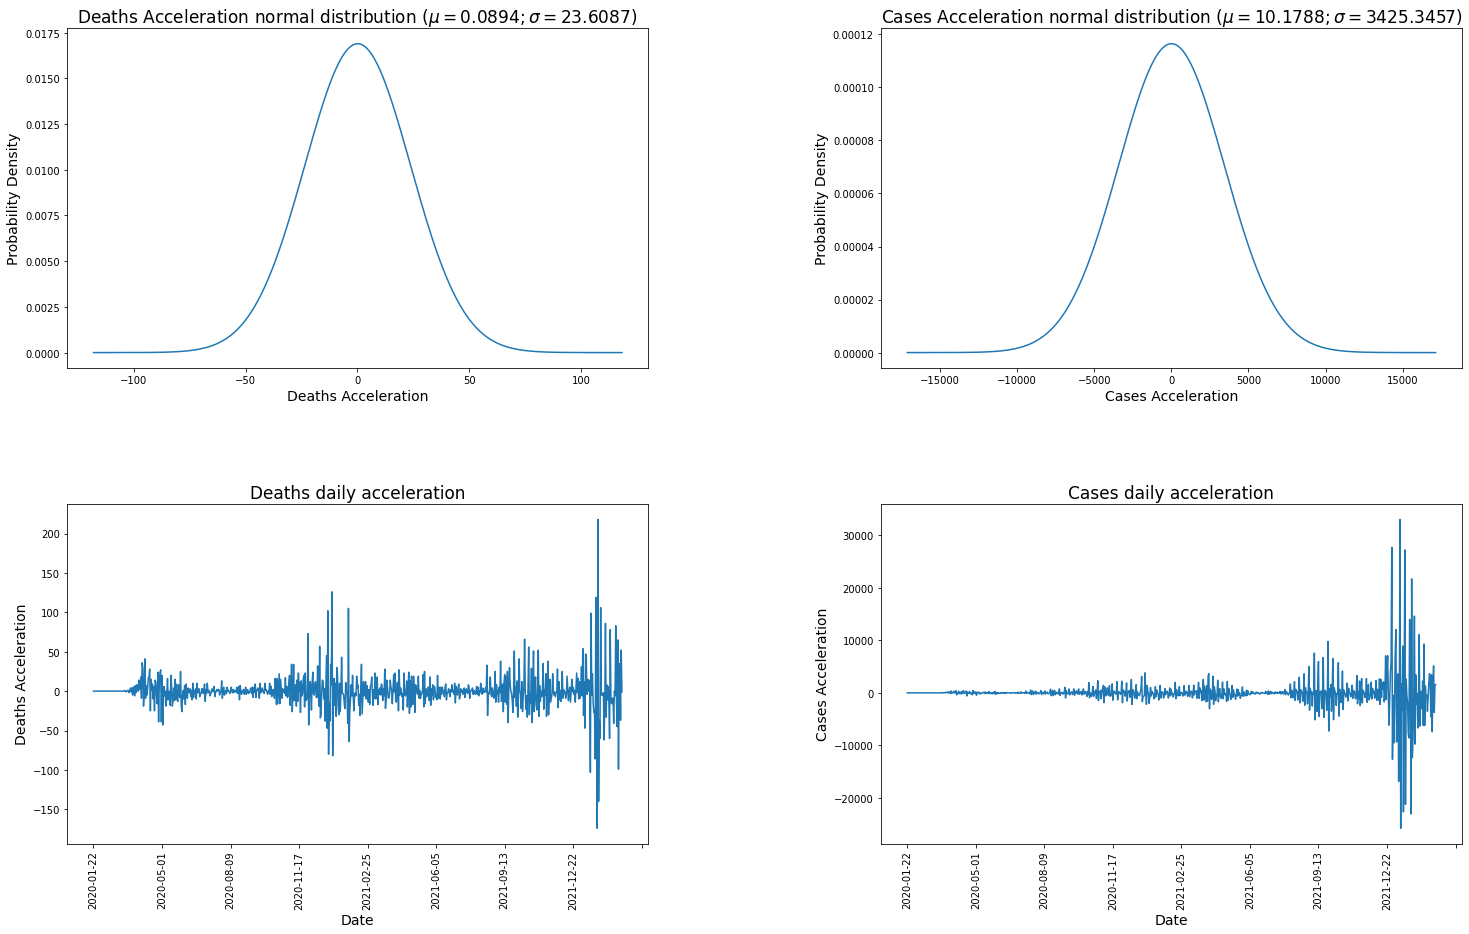

In [10]:
Printer.plotAccelerations(daily_cases)

To determine those aberrant values, we need to know how _far_ are the acceleration values from the mean in a sample. Let 
$$
\mathcal{S} = \{Δ^2I(t), Δ^2I(t+1), \ldots, Δ^2I(t+n-1)\}
$$ 
be a sample of size $n$ from time $t$ to $t+n-1$. To calculate that distance from the mean in the sample, we use the __z-score__ defined as:
$$
Z_{i} = \frac{Δ^2I(i) - \overline{Δ^2I}}{s}
$$
where $\overline{Δ^2I}$ is the mean in the sample $\mathcal{S}$, $s$ is the standard deviation of the sample $\mathcal{S}$ and $Δ^2I(i)$ is the acceleration at time $i$. There are 3 possible cases:
- $Z_i \geq τ$ means that $Δ^2I(i)$ is __aberrant__ by positive excess;
- $Z_i \leq -τ$ means that $Δ^2I(i)$ is __aberrant__ by negative excess;
- $-τ < Z_i < τ$ means that $Δ^2I(i)$ is __not aberrant__.

Therefore, the parameters to provide to this model are:
- $n$: the size of the sample $\mathcal{S}$ which represents the number of days whose acceleration values are taken.
- $τ$: the threshold to determine if an acceleration value is aberrant or not.

In our example below, we take samples of size $30$ to represent a month and a distance of $2.5$ standard deviations from the mean as the threshold.

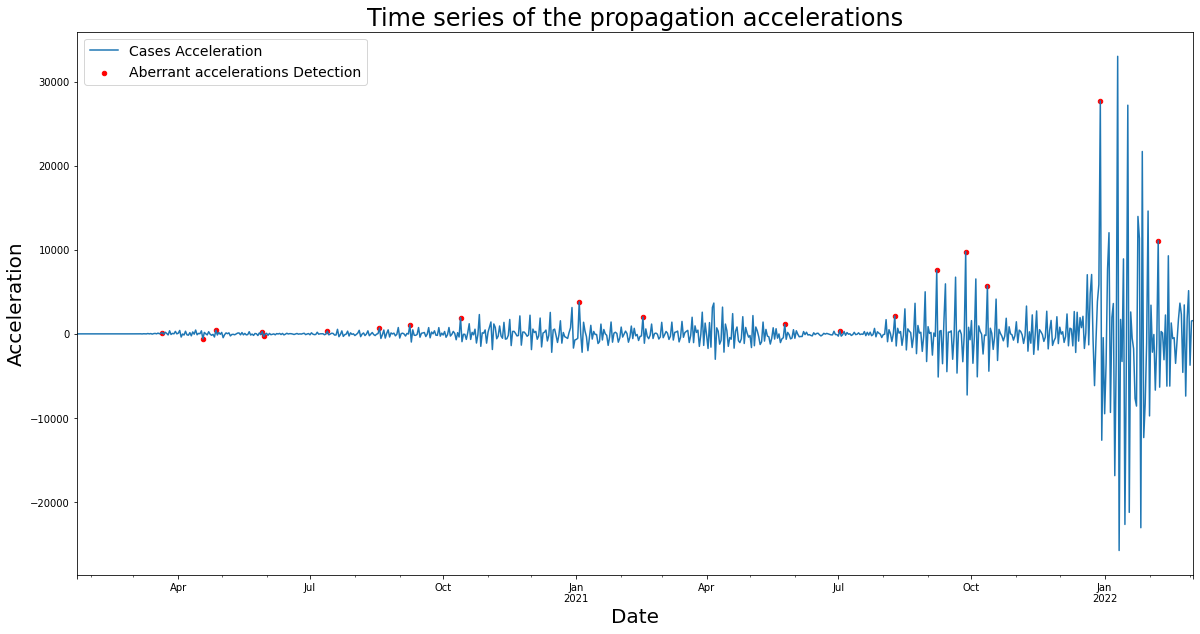

In [11]:
daily_cases['is_aberrant'] = PropagationModel.findAberrantAccelerations(np.array(daily_cases['cases_acceleration']), n=30, tau=2.5)
PropagationModel.plotAberrantAccelerations(daily_cases)

# Probabilistic Propagation States Model
The objective is to show how to obtain the probability of dying or recovering once all the population has been infected. The Markov Chains are used to demonstrated this because we use the probability of transiting from a state to another one.

Let $X = (X_t)_{t \geq  0}$ be a sequence of random variables where each random variable is representing a person $X$ at day $t \geq 0$. Let $\mathbb{E} = \{S, I, R, D\}$ the propagation states space. At any day $t$, a person $X_t$ has to be in a state of $\mathbb{E}$. If $i, j \in \mathbb{E}$, then $\mathbb{P}(X_{t} \in j | X_{t-1} \in i) = p_{i,j}$. A person at day $t=0$ as to start in a state of $\mathbb{E}$.

The probability that a susceptible person becomes infected at day $t$ is defined as 
$$
\mathbb{P}(X_{t} \in I | X_{t-1} \in S) = \beta.
$$ 
The susceptible people that do not transit to the infected state is expressed as 
$$
\mathbb{P}(X_{t} \in S | X_{t-1} \in S) = 1 - \beta.
$$
Per assumption 5, it is impossible to transit from the _Infected_ state to the _Susceptible_ state. Therefore, we have $\mathbb{P}(X_{t} \in S | X_{t-1} \in I) = 0$.

The assumption 2 states that an infected person can transit to the _Death_ state or to the _Recovery_ state. It means that 
$$
\mathbb{P}(X_{t} \in R | X_{t-1} \in I) = \gamma
$$ 
and 
$$
\mathbb{P}(X_{t} \in D | X_{t-1} \in I) = \alpha.
$$
Since the sets of recovered $R$ and deaths $D$ are mutually disjoint, we have that:
$$
\begin{aligned}
    \mathbb{P}(X_{t} \in R \cup D | X_{t-1} \in I) &= \mathbb{P}(X_{t} \in R | X_{t-1} \in I) + \mathbb{P}(X_{t} \in D | X_{t-1} \in I) \\
    &= \gamma + \alpha
\end{aligned}
$$
We deduce that the remaining infected people that will stay in the _Infected_ state (will not transit to another state on the next day) from day $t-1$ to day $t$ is 
$$
\mathbb{P}(X_{t} \in I | X_{t-1} \in I) = 1 - \alpha - \gamma.
$$
The transition matrix (noted $P$) is the following considering the order in $\mathbb{E}$ and the transition between day $t - 1$ and day $t$:
$$
P = 
\begin{bmatrix}
    p_{S, S} & p_{S, I} & p_{S, R} & p_{S, D} \\
    p_{I, S} & p_{I, I} & p_{I, R} & p_{I, D} \\
    p_{R, S} & p_{R, I} & p_{R, R} & p_{R, D} \\
    p_{D, S} & p_{D, I} & p_{D, R} & p_{D, D}
\end{bmatrix}
=
\begin{bmatrix}
    1 - \beta & \beta & 0 & 0 \\
    0 & 1 - \alpha - \gamma & \gamma & \alpha \\
    0 & 0 & 1 & 0 \\
    0 & 0 & 0 & 1 
\end{bmatrix}
$$

Let's assume that there is an infected person, no deaths and no recovery on the first day. Including that there are $p - 1$ susceptible people, this means that if $\mathbf{x}^{(0)}$ is the initial vector, we have:
$$
\mathbf{x}^{(1)} = \mathbf{x}^{(0)} P
= \begin{bmatrix}
      p - 1 & 1 & 0 & 0
  \end{bmatrix}
  \begin{bmatrix}
    1 - \beta & \beta & 0 & 0 \\
    0 & 1 - \alpha - \gamma & \gamma & \alpha \\
    0 & 0 & 1 & 0 \\
    0 & 0 & 0 & 1 
\end{bmatrix}  
=
\begin{bmatrix}
    (p - 1)(1 - \beta) & (p - 1)\beta + (1 - \alpha - \gamma) & \gamma & \alpha
\end{bmatrix}
$$
On the second day, we have:
$$
\mathbf{x}^{(2)} = \mathbf{x}^{(1)} P 
=
\begin{bmatrix}
    (p - 1)(1 - \beta)^2 & \\
    \beta(p - 1)((1 - \beta) + (1 - \alpha - \gamma)) + (1 - \alpha - \gamma)^2 & \\
    \beta(p - 1)\gamma + \gamma((1 - \alpha - \gamma) + 1) & \\
    \beta(p - 1)\alpha + \alpha ((1 - \alpha - \gamma) + 1)
\end{bmatrix}^T
$$
For $n$ days, we have $\mathbf{x}^{(n)} = \mathbf{x}^{(0)} P^n$. By induction on $n \geq 1$, one shows that:
$$
\mathbf{x}^{(n)} = \mathbf{x}^{(0)} P^n
=
\begin{bmatrix}
    (p - 1)(1 - \beta)^n & \\
    \beta(p - 1) \sum\limits_{i = 0}^{n-1} (1-\beta)^{n-1-i} (1-\alpha-\gamma)^i + (1 - \alpha - \gamma)^n & \\
    \beta(p - 1)\gamma \sum\limits_{i = 0}^{n-2} (1-\beta)^i (1 - \alpha - \gamma)^{n - 2 - i} + \gamma \sum\limits_{i = 0}^{n-1} (1 - \alpha - \gamma)^i & \\
    \beta(p - 1)\alpha \sum\limits_{i = 0}^{n-2} (1-\beta)^i (1 - \alpha - \gamma)^{n - 2 - i} + \alpha \sum\limits_{i = 0}^{n-1} (1 - \alpha - \gamma)^i 
\end{bmatrix}^T
$$

We have to find the probability distribution of $\mathbf{x}$. To do so, we have to find $\mathbf{x} = \lim\limits_{n \rightarrow \infty} \mathbf{x}^{(n)}$ that we calculates term by term in $\mathbf{x}^{(n)}$. 

The __first term__ is:
$$
\lim\limits_{n \rightarrow \infty} (p - 1)(1 - \beta)^n = 0
$$
because $0 < \beta \leq 1$ implying that $0 \leq (1 - \beta) < 1$. 

For the __second term__, we have:
$$
\lim\limits_{n \rightarrow \infty} \beta(p - 1) \sum\limits_{i = 0}^{n-1} (1-\beta)^{n-1-i} (1-\alpha-\gamma)^i + (1 - \alpha - \gamma)^n 
= \beta(p - 1) \lim\limits_{n \rightarrow \infty} \sum\limits_{i = 0}^{n-1} (1-\beta)^{n-1-i} (1-\alpha-\gamma)^i + \lim\limits_{n \rightarrow \infty} (1 - \alpha - \gamma)^n = 0.
$$
Indeed, we get $\lim\limits_{n \rightarrow \infty} (1 - \alpha - \gamma)^n = 0$ because $0 \leq(1 - \alpha - \gamma) < 1$. We also have that $\lim\limits_{n \rightarrow \infty} \sum\limits_{i = 0}^{n-1} (1-\beta)^{n-1-i} (1-\alpha-\gamma)^i = 0$ because $\lim\limits_{n \rightarrow \infty} (1-\beta)^{n-1-i} = 0$ since $0 \leq \beta < 1$.

For the __third term__, we have:
$$
\beta(p - 1)\gamma \lim\limits_{n \rightarrow \infty} \sum\limits_{i = 0}^{n-2} (1-\beta)^i (1 - \alpha - \gamma)^{n - 2 - i} + \gamma \lim\limits_{n \rightarrow \infty} \sum\limits_{i = 0}^{n-1} (1 - \alpha - \gamma)^i = \gamma \lim\limits_{n \rightarrow \infty} \sum\limits_{i = 0}^{n-1} (1 - \alpha - \gamma)^i = \gamma \sum\limits_{i = 0}^{\infty} (1 - \alpha - \gamma)^i
$$
because using the same properties as for the second term, the first limit is evaluated to $0$. For the second limit, we have a geometric series of ratio $(1 - \alpha - \gamma) < 1$. Note that it is impossible to have $(1 - \alpha - \gamma) = 1$ because it would mean that $\alpha = \gamma = 0$ which contradicts our assumption stating that an infected person at day $t$ has to transit to either the _Recovered_ state or the _Dead_ state at day $t + k$ where $k \geq 1$. Therefore, we have that:
$$
\gamma \sum\limits_{i = 0}^{\infty} (1 - \alpha - \gamma)^i = \frac{\gamma}{1 - (1-\alpha-\gamma)} = \frac{\gamma}{\alpha + \gamma}.
$$
For the __fourth term__, we use the same logic as the third term:
$$
\beta(p - 1)\alpha \lim\limits_{n \rightarrow \infty} \sum\limits_{i = 0}^{n-2} (1-\beta)^i (1 - \alpha - \gamma)^{n - 2 - i} + \alpha \lim\limits_{n \rightarrow \infty} \sum\limits_{i = 0}^{n-1} (1 - \alpha - \gamma)^i = \alpha \lim\limits_{n \rightarrow \infty} \sum\limits_{i = 0}^{n-1} (1 - \alpha - \gamma)^i = \frac{\alpha}{\alpha + \gamma}.
$$
Therefore, we obtain the final result:
$$
\mathbf{x} = 
\begin{bmatrix}
      0 & 0 & \frac{\gamma}{\alpha + \gamma} & \frac{\alpha}{\alpha + \gamma}
  \end{bmatrix}.
$$
This proves that $\mathbf{x}$ is a probability distribution because:
- $\frac{\gamma}{\alpha + \gamma} + \frac{\alpha}{\alpha + \gamma} = 1$;
- $0 \leq \frac{\gamma}{\alpha + \gamma} \leq 1$ and $0 \leq \frac{\alpha}{\alpha + \gamma} \leq 1$.

The vector $\mathbf{x}$ means that when $t → ∞$:
- It remains $0$ susceptible people;
- It remains $0$ active infected people;
- There is a probability of $\mathbb{P}(X_t \in R) = \frac{\gamma}{\alpha + \gamma}$ that people __recover__ from the infection;
- There is a probability of $\mathbb{P}(X_t \in D) = \frac{\alpha}{\alpha + \gamma}$ that people __die__ from the infection.

# Virus Propagation Model Solutions
The objective is to solve the first-order differential equations defined for the 3 transitions in order to find $S(t)$, $I(t)$ and $R(t)$ in function of $t$. However, it is useful to mention that the propagation is described basically by the 3 following phases:

1. **Initialization** The propagation will start and slowly progress; only a small number of people will be infected at the beginning of the pandemic.
2. **Acceleration** The propagation will increase quickly because every person infected will infect other people that were not infected making the propression increasing exponentially.
3. **Resolution** The worst case is when the majority of the population is infected. Indeed, there are less non-infected people remaining and the progression will have no choice but to slow down until all people of the population are infected.

These phases justify why the sigmoid function is a good choice. This sigmoid function $C(t)$ starts at $t = 0$ and ends until all the population is infected. Therefore, we deduce that the bounds of $t$ and $C(t)$ are $t \in [0, \infty[$ and $C(t) \in [0, p]$ where $C(t)$ will increase over days (cumulative function). It follows that $\lim\limits_{t \rightarrow \infty} C(t) = p$.

## Cumulative Infected and Susceptible Solutions
We know that when susceptible people are getting infected, the same number of people decreases from the _Susceptible_ state to increase in the _Infected_ state from day $t-1$ to day $t$. It means that $C(t) = p - S(t)$. Therefore, we have:
$$
\begin{aligned}
    \frac{\partial C(t)}{\partial t} &= \beta C(t) (p - C(t)) \\
        &= p \beta C(t) - \beta C^2(t)
\end{aligned}
$$
which is a Bernouilli's differential equation. Dividing the equation by $C^2(t)$ gives:
$$
\frac{\frac{\partial C(t)}{\partial t}}{C^2(t)} - \frac{p \beta}{C(t)} = -\beta.
$$
Let $y(t) = -\frac{1}{C(t)}$. We have $\frac{\partial y(t)}{\partial t} = \frac{1}{C^2(t)} \frac{\partial C(t)}{\partial t}$. Replacing in the equation above, we get:
$$
\frac{\partial y(t)}{\partial t} = -\beta(1 + p y(t)).
$$
Dividing by $1 + p y(t)$ on both sides gives:
$$
\frac{\frac{\partial y(t)}{\partial t}}{1 + p y(t)} = -\beta.
$$
Since 
$$
\int \frac{1}{1 + py(t)} dt = \frac{1}{p} \ln ( 1 + p y(t)),
$$
we have, after multiplying by $p$ on both sides:
$$
\frac{\partial (\ln ( 1 + p y(t)))}{\partial t} = -p \beta.
$$
We know that $t \geq 0$, hence we have to integrate this last equation from $0$ to $t$ on both sides:
$$
\int_0^t \frac{\partial (\ln ( 1 + p y(x)))}{\partial x} dx = -p \beta \int_0^t dx
$$
which gives:
$$
\ln (1 + p y(t)) - \ln (1 + py(0)) = -p \beta t.
$$
Using the substraction of logarithms property, we have:
$$
\ln \left(\frac{1 + p y(t)}{1 + py(0)}\right) = -p \beta t.
$$
Applying the exponential function on both sides, it follows that:
$$
\frac{1 + p y(t)}{1 + py(0)} = e^{-p \beta t}
$$
which is equivalent to:
$$
y(t) = \frac{(1 + py(0)) e^{-p \beta t} - 1}{p}.
$$
Since $y(t) = -\frac{1}{C(t)}$ and then $y(0) = -\frac{1}{C(0)}$, we have
$$
\begin{aligned}
C(t) &= \frac{p}{1 - \left(1 - \frac{p}{C(0)}\right)e^{-p \beta t}} \\
     &= \frac{p}{1 + \left(\frac{p}{C(0)} - 1\right)e^{-p \beta t}}
\end{aligned}
$$
because $1 - \frac{p}{C(0)} \leq 0$, and $C(0) > 0$ because having $C(0) = 0$ implies that there are no infected people and then the propagation cannot start. Using the same method to solve $\frac{\partial S(t)}{\partial t} = -\beta S(t) (p - S(t))$, we obtain:
$$
S(t) = \frac{p}{1 + \left(\frac{p}{S(0)} - 1\right)e^{p \beta t}}
$$
where $S(0) > 0$ because having $S(0) = 0$ implies that there is no population initially which is impossible.

We know that $t \in [0, \infty[$ and $S(t), C(t) \in [0, p]$. Taking the limit to infinite days, we have for $C(t)$ that:
$$
\lim_{t \rightarrow \infty} \frac{p}{1 - \left(1 - \frac{p}{C(0)}\right)e^{-p \beta t}} = p
$$
and for the initial day:
$$
\lim_{t \rightarrow 0} \frac{p}{1 - \left(1 - \frac{p}{C(0)}\right)e^{-p \beta t}} = C(0).
$$
Taking the limit to infinite days, we have for $S(t)$ that:
$$
\lim_{t \rightarrow \infty} \frac{p}{1 + \left(\frac{p}{S(0)} - 1\right)e^{p \beta t}} = 0
$$
and for the initial day:
$$
\lim_{t \rightarrow 0} \frac{p}{1 + \left(\frac{p}{S(0)} - 1\right)e^{p \beta t}} = S(0).
$$

## Number of Recovered and Deaths Solutions
We know that $\frac{\partial R(t)}{\partial t} = \gamma I(t)$. But $I(t) = C(t) - R(t) - D(t)$ hence: 
$$
\frac{\partial R(t)}{\partial t} = \gamma(C(t) - R(t) - D(t)).
$$
However, $R(t)$ and $D(t)$ are the same except that the constant $\alpha$ is used instead of $\gamma$. Let $R_D(t) = R(t) + D(t)$ and $k = \gamma + \alpha$. It comes that:
$$
\frac{\partial R_D(t)}{\partial t} = k(C(t) - R_D(t))
$$
which is equivalent to:
$$
\frac{\partial R_D(t)}{\partial t} + kR_D(t) = kC(t).
$$
This is a first-order differential equation. First, let's solve the homogeneous equation:
$$
\frac{\partial R_D(t)}{\partial t} + kR_D(t) = 0.
$$
Hence, we have to solve the separated-variable equation:
$$
\frac{\partial R_D(t)}{\partial t} = -kR_D(t).
$$
After dividing by $R_D(t)$ on both sides:
$$
\frac{\partial R_D(t)}{R_D(t)} = -k\partial t.
$$
Then integrating both sides we obtain the general solution:
$$
R_D(t) = R_0 e^{-kt}
$$
where $R_0 \in \mathbb{R}$ is the integration constant. Suppose that $R_0$ is function of $t$ in $R_D(t)$ where $R_D(t) = R_0(t) e^{-kt}$ and substitute it in the initial equation:
$$
\begin{aligned}
  kC(t) &= \frac{\partial R_0(t) e^{-kt}}{\partial t} + kR_0(t) e^{-kt} \\
          &= \frac{\partial R_0(t)}{\partial t} e^{-kt} + R_0(t) \frac{\partial e^{-kt}}{\partial t} + kR_0(t) e^{-kt} \\
          &= \frac{\partial R_0(t)}{\partial t} e^{-kt} -kR_0(t)e^{-kt} + kR_0(t)e^{-kt} \\
          &= \frac{\partial R_0(t)}{\partial t} e^{-kt}.
\end{aligned}
$$
It follows that:
$$
\frac{\partial R_0(t)}{\partial t} = kC(t)e^{kt}.
$$
Knowing $C(t)$, we have to solve:
$$
R_0(t) = kp \int \frac{e^{kt} dt}{1 + \left(\frac{p}{C(0)} - 1\right)e^{-p \beta t}}
$$
where $C(0) > 0$. Let $\delta = \frac{p}{C(0)} - 1$. The previous equation is then written as:
$$
R_0(t) = kp \int \frac{e^{kt} dt}{1 + \delta e^{-p \beta t}}.
$$
The result of this integral is given by:
$$
R_0(t) = \frac{k p e^{t(p \beta + k)} {}_{2}F_1\left(1; \frac{k}{p \beta} + 1; \frac{k}{p \beta} + 2; -\frac{e^{p \beta t}}{\delta}\right)}{\delta(p \beta + k)} + D_0
$$
where ${}_{2}F_1(\cdot)$ is the Gauss's hypergeometric function and $D_0 \in \mathbb{R}$ is the integration constant. Subtituing $R_0(t)$ in $R_D(t) = R_0(t) e^{-k t}$ gives:
$$
R_D(t) = \frac{k p e^{p \beta t} {}_{2}F_1\left(1; \frac{k}{p \beta} + 1; \frac{k}{p \beta} + 2; -\frac{e^{p \beta t}}{\delta}\right)}{\delta(p \beta + k)} + D_0 e^{-k t}.
$$
We can conclude on the following equations for $R(t)$:
$$
R(t) = \frac{\gamma p e^{p \beta t} {}_{2}F_1\left(1; \frac{\gamma}{p \beta} + 1; \frac{\gamma}{p \beta} + 2; -\frac{e^{p \beta t}}{\delta}\right)}{\delta(p \beta + \gamma)} + D_0 e^{-\gamma t}
$$
and for $D(t)$:
$$
D(t) = \frac{\alpha p e^{p \beta t} {}_{2}F_1\left(1; \frac{\alpha}{p \beta} + 1; \frac{\alpha}{p \beta} + 2; -\frac{e^{p \beta t}}{\delta}\right)}{\delta(p \beta + \alpha)} + D_0 e^{-\alpha t}.
$$

Note that $\delta(p \beta + \alpha) \neq 0$. Indeed, we have that:
$$
\begin{aligned}
    \delta(p \beta + \alpha) &= \left(\frac{p}{C(0)} - 1\right)(p\beta + \alpha) \neq 0 \\
    &⇔ α \neq -pβ
\end{aligned}
$$
which is always true because $\alpha > 0$ and $-pβ < 0$.

# Model Simulation
The objective is to simulate the first Covid-19 propagation wave in Canada as an example by using our dataset. The dataset provides $C(t)$, $D(t)$, $t$ and $p$ where we set $p$ as the number of cumulative infected after the first propagation wave. However, the dataset does not provide any data on $R(t)$ and $I(t)$. Therefore, we will not consider them in the simulation.

## Finding the probability $\beta$
From the propagation velocity model, we could use the discrete cumulative infected people function $ΔC(t)$ but when $ΔC(t) = 0$, it follows that:
$$
\beta = \frac{ΔC(t)}{S(t)C(t)} = 0
$$
which means that the probability of infected other people is zero making no sense. Therefore, we use directly the solution $C(t)$ found to isolate $\beta$:
$$
C(t) = \frac{p}{1 + (p - 1)e^{-p \beta t}}
$$
we deduce that:
$$
\beta = \frac{\ln\left(\frac{(p-1)C(t)}{p - C(t)}\right)}{pt}.
$$

The idea is to calculate $\beta$ for $t \in \{1, 2, \ldots, t_{max}\}$ (that we note $\beta(t)$) and visualize the behavior of $\beta(t)$ in order to determine a value or even a function for $\beta(t)$. For the simulation, we simply use the median of $\beta(t)$.

## Approximation of the Probability $\alpha$
Since $R(t)$ is not given in the dataset, we cannot tell what is $I(t)$. Then, in order to find $\alpha$, we have to use the solution we found and isolate $\alpha$:
$$
D(t) = \frac{\alpha p e^{p \beta t} {}_{2}F_1\left(1; \frac{\alpha}{p \beta} + 1; \frac{\alpha}{p \beta} + 2; -\frac{e^{p \beta t}}{p - 1}\right)}{(p - 1)(p \beta + \alpha)}.
$$
However, after manipulating the equation to isolate $\alpha$:
$$
\frac{(p - 1)D(t)}{p e^{p \beta t}} = \frac{\alpha {}_{2}F_1\left(1; \frac{\alpha}{p \beta} + 1; \frac{\alpha}{p \beta} + 2; -\frac{e^{p \beta t}}{p - 1}\right)}{p \beta + \alpha}
$$
it is still complex to find $\alpha$ mainly because of the Gauss hypergeometric function which contains $\alpha$ in its parameters. Let:
- $b = \frac{\alpha}{p\beta}$;
- $z = \frac{e^{p \beta t}}{p - 1}$.

By definition:
$$
\begin{aligned}
{}_{2}F_1(1; b + 1; b + 2; -z) &= (b + 1) \sum\limits_{n = 0}^{\infty} \frac{(-z)^n}{b + 1 + n} \\
    &= (b + 1) \int_0^1 \frac{s^b}{1 + zs} ds.
\end{aligned}
$$
In the parameter $b$, we know that the population will not be all infected at once. We expect that it will take a certain amount of days before infecting most of the population. Hence, we assume that $p\beta \approx 1$ or greater and we know that $\alpha << 1$. Thus, we expect that $b ≈ 0$ implying that:
$$
\begin{aligned}
{}_{2}F_1(1; b + 1; b + 2; -z) &≈ {}_{2}F_1(1; 1; 2; -z) \\
    &= \int_0^1 \frac{1}{1 + zs} ds \\
    &= \frac{\ln(z + 1)}{z} \\
    &= (p - 1)e^{-p \beta t}\ln\left(\frac{e^{p \beta t}}{p - 1} + 1\right).
\end{aligned}
$$
Replacing in $D(t)$, we have:
$$
\frac{D(t)}{p} = \frac{\alpha \ln\left(\frac{e^{p \beta t}}{p - 1} + 1\right)}{p \beta + \alpha}
$$
if and only if:
$$
\frac{D(t)}{p\ln\left(\frac{e^{p \beta t}}{p - 1} + 1\right)} = \frac{\alpha}{p \beta + \alpha}
$$
Therefore:
$$
\alpha = \frac{p\beta D(t)}{p\ln\left(\frac{e^{p \beta t}}{p - 1} + 1\right) - D(t)}.
$$
<!--
$$
\begin{aligned}
{}_{2}F_1(1; b + 1; b + 2; -z) &≈ {}_{2}F_1(1; 2; 3; -z) \\
    &= 2 \int_0^1 \frac{s}{1 + zs} ds \\
    &= \frac{2(z -\ln(z + 1))}{z^2} \\
    &= \frac{2(\frac{e^{p \beta t}}{p - 1} -\ln(\frac{e^{p \beta t}}{p - 1} + 1))}{\frac{e^{2p \beta t}}{(p - 1)^2}} \\
    &= 2(p-1)e^{-p\beta t}\left(1 - (p-1)e^{-p\beta t}\ln\left(\frac{e^{p\beta t}}{p-1} + 1\right)\right)
\end{aligned}
$$
Replacing in $D(t)$, we have:
$$
\frac{D(t)}{p} = \frac{2\alpha \left(1 - (p-1)e^{-p\beta t}\ln\left(\frac{e^{p\beta t}}{p-1} + 1\right)\right)}{p \beta + \alpha}
$$
if and only if:
$$
\frac{D(t)}{2p\left(1 - (p-1)e^{-p\beta t}\ln\left(\frac{e^{p\beta t}}{p-1} + 1\right)\right)} = \frac{\alpha}{p \beta + \alpha}
$$
Therefore:
$$
\alpha = \frac{p\beta D(t)}{2p\left(1 - (p-1)e^{-p\beta t}\ln\left(\frac{e^{p\beta t}}{p-1} + 1\right)\right) - D(t)}.
$$
-->

In [12]:
start_date = daily_cases.loc[daily_cases['total_cases'] < 2].index[-1]
initial_values = {'C0': 1,
                  #'R0': 0,
                  'D0': 0,
                  'date': start_date}

t_max = 150

simulation = daily_cases[start_date:].head(t_max)[['total_cases', 'total_deaths', 'cases_velocity', 'deaths_velocity']]
simulation['day'] = np.arange(len(simulation))
simulation = simulation[1:]

#p = population.loc[population['entity'] == "Canada"]['population'].iloc[0]
p = simulation['total_cases'][-1] + 1
simulation['susceptibles'] = p - simulation['total_cases']
simulation['beta'] = np.log((p-1)*simulation['total_cases'] / simulation['susceptibles']) / (p*simulation['day'])

logexp = np.log((np.exp(np.array(p*simulation['beta']*simulation['day'], dtype=np.float128))/(p-1)) + 1)
simulation['alpha'] = (p*simulation['beta']*simulation['total_deaths']) / ((p * logexp) - simulation['total_deaths'])
#simulation['active_infected'] = np.where(simulation['alpha'] > 0, simulation['deaths_velocity'] / simulation['alpha'], 0)

# Model parameters.
parameters = {'alpha': np.median(simulation['alpha']),
              'beta': np.median(simulation['beta']),
              'population': p,
              'days': t_max}
print(parameters)
display(simulation)

{'alpha': 0.0027675195980916975056, 'beta': 1.1435260350259184e-06, 'population': 101027, 'days': 150}


,total_cases,total_deaths,cases_velocity,deaths_velocity,day,susceptibles,beta,alpha
date,,,,,,,,
2020-01-23,2,0,2,0,1,101025,0.000007,0.000000
2020-01-24,3,0,1,0,2,101024,0.000005,0.000000
2020-01-25,3,0,0,0,3,101024,0.000004,0.000000
2020-01-26,3,0,0,0,4,101024,0.000003,0.000000
2020-01-27,3,0,0,0,5,101024,0.000002,0.000000
...,...,...,...,...,...,...,...,...
2020-06-15,99485,8778,377,21,145,1542,0.000001,0.002296
2020-06-16,99844,8791,359,13,146,1183,0.000001,0.002181
2020-06-17,100232,8803,388,12,147,795,0.000001,0.002038


,cumulative_infected,deaths,susceptibles
date,,,
2020-01-22,1,0,101026
2020-01-23,1,0,101026
2020-01-24,1,0,101026
2020-01-25,1,0,101026
2020-01-26,1,0,101026
...,...,...,...
2020-06-15,100488,11822,539
2020-06-16,100546,12067,481
2020-06-17,100598,12311,429


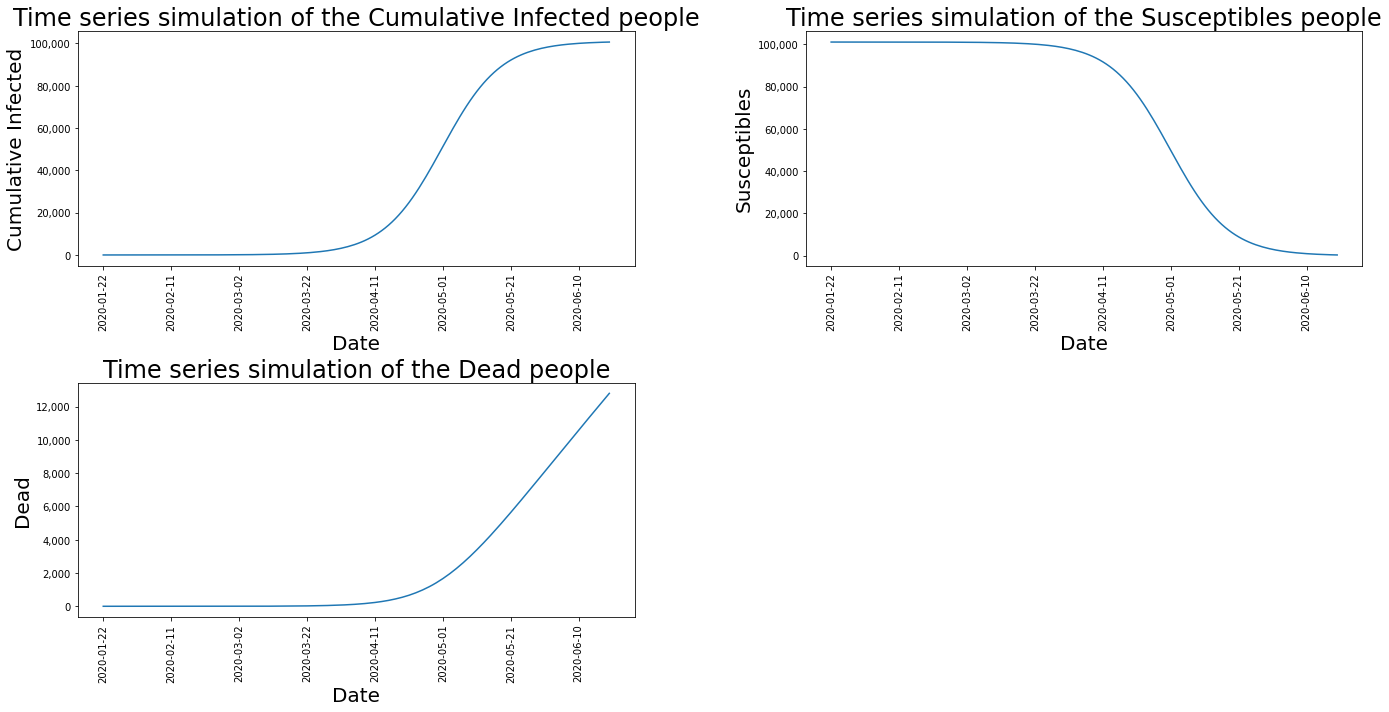

In [13]:
model = PropagationModel.createPropagationSimulation(initial_values, parameters)
#print("Probability of dying: {:.2f} %".format(parameters['alpha'] / (parameters['alpha'] + parameters['gamma']) * 100))
#print("Probability of recovering: {:.2f} %".format(parameters['gamma'] / (parameters['alpha'] + parameters['gamma']) * 100))
display(model)
PropagationModel.plotModelSimulation(model)